<a href="https://colab.research.google.com/github/ignacio-jalpin/Machine-Learning1/blob/main/Tarea_SGD_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Modelo de regression Logistica

$$\hat{y} = p = \dfrac{1}{1 + \exp{-(\theta_0 + \theta_1 x)}} $$

In [ ]:
# El modelo de regression logistica asume que la relacion entre variables esta mediada por la funcion logistica

def y_hat(theta_0, theta_1, x):
    p = 1. / (1. + np.exp(-(theta_0 + theta_1 * x)))
    return(p)


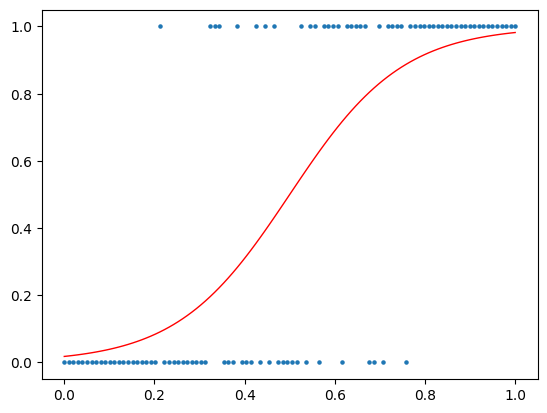

In [ ]:
# Simulemos 100 datos para nuestra regression logistica
n = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_0, theta_1 = [-4, 8]

# Simular los datos x1, y
# Grilla de valores para nuestra covariable
x1 = np.linspace(0, 1, n)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y = np.random.binomial(1, y_hat(theta_0, theta_1, x1), n)

# Graficamos
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, 8, x1), color='red', linewidth = 1)

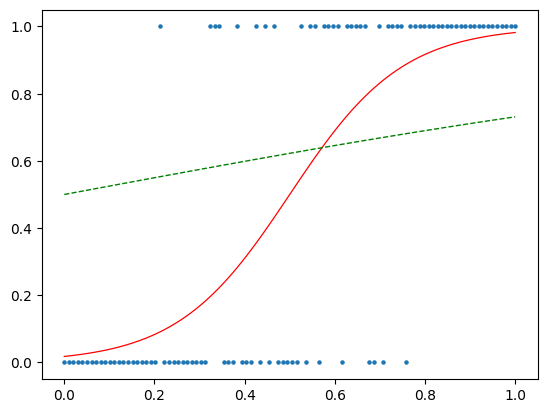

In [ ]:
# Ahora vamos a realizar un SGD para estimar los parametros theta.
# Inicializar parametros
t0 = 0
t1 = 1

plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, 8, x1), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados (no aprendidos aun)
plt.plot(x1, y_hat(t0, t1, x1), color= 'green', linewidth= 1, linestyle= '--')

## Loss function

$$ \mathcal{L} = -\dfrac{1}{n} \sum \left(Y \log(\hat{y}) + (1-Y) \log(1 - \hat{y}) \right)$$

In [ ]:
# Definimos nuestra Loss function
def loss_fun(Y, X, t0, t1):
    loss = -1/n * np.sum(Y * np.log(y_hat(t0, t1, X)) + (1 - Y) * np.log(1 - y_hat(t0, t1, X)))
    return(loss)

# Obtenemos la cantidad error que cometemos
loss_ini = loss_fun(y, x1, t0, t1)
print("LOSS inicial:", loss_ini)

LOSS inicial: 0.6341158460306865


In [ ]:
# Llevamos regsitro del error y los parametros
error = []
error.append(loss_ini)

t0_hat = []
t1_hat = []

t0_hat.append(t0)
t1_hat.append(t1)

## Gradient Descent
$$\nabla_{\theta_0} \mathcal{L} = \sum \hat{y} - y $$

$$\nabla_{\theta_1} \mathcal{L} = \sum (\hat{y} - y) x $$

In [ ]:
# Gradient descent
def delta_theta_0(y, x1, t0, t1):
    delta_0 = np.sum((y_hat(t0, t1, x1) - y))
    return(delta_0)

def delta_theta_1(y, x1, t0, t1):
    delta_1 = np.sum((y_hat(t0, t1, x1) - y) * x1)
    return(delta_1)

# Step size o learnig rate
rho = 0.3


In [ ]:
t0 -= rho * delta_theta_0(y, x1, t0, t1)
t1 -= rho * delta_theta_1(y, x1, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun(y, x1, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')


[0, -0.13006820538605987, -0.23366226327572653, -0.3177404379002485, -0.3875963749312733, -0.4471268001470132, -0.49914938675058695, -0.5456822168829929, -0.5881637704307382, -0.6276174136994913, -0.6647711763392207, -0.7001437231331501, -0.73410556478109, -0.766922440018464, -0.7987859841108451, -0.8298353817895747, -0.8601726475831155, -0.8898734097055061, -0.918994524023973, -0.9475794538388891, -0.9756620747220214, -1.0032693686166152, -1.0304233340471853, -1.0571423426401558, -1.0834421041740456, -1.1093363545536148, -1.1348373474459967, -1.159956206617018, -1.1847031793045768, -1.2090878191861982, -1.233119119181355, -1.2568056084515757, -1.2801554238029305, -1.3031763627500355, -1.325875923411978, -1.3482613349276047, -1.370339581023474, -1.3921174186175314, -1.4136013928069815, -1.4347978492074336, -1.4557129443379653, -1.4763526545519357, -1.4967227838738764, -1.5168289710028096, -1.5366766956705817, -1.5562712844922562, -1.575617916408526, -1.5947216277934213, -1.613587317281

Text(0.5, 1.0, 'Loss en funcion del Epoch')

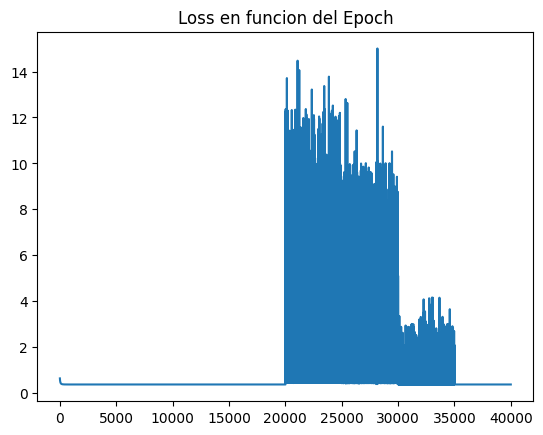

In [ ]:
epoch = 5000

for i in range(epoch):
    t0 -= rho * delta_theta_0(y, x1, t0, t1)
    t1 -= rho * delta_theta_1(y, x1, t0, t1)
    
    t0_hat.append(t0)
    t1_hat.append(t1)
    
    loss = loss_fun(y, x1, t0, t1)
    error.append(loss)
#data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAh8AAAGzCAYAAACPa3XZAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABZlElEQVR4nO3deVxU5f4H8M8AMiAK7guKikvuu+k1NTUtM/Nqt8XKq+ZtuZWWptXVWy6tmP0qy7zactNWzbxuWZq4awqKiIorIJsiICC7DMs8vz+IiYFhmGHOnGXm8369eL105sw533nmLN/znGfRCSEEiIiIiGTioXQARERE5F6YfBAREZGsmHwQERGRrJh8EBERkayYfBAREZGsmHwQERGRrJh8EBERkayYfBAREZGsmHwQERGRrJh8ELmwXbt2oV+/fvDx8YFOp0N2drZisSxduhQ6nU6x7VeVkJAAnU6HdevW2f3ZAwcOQKfT4cCBA5LHJad169ZBp9MhIiJC6VDIzTD5IJfBE6m5zMxMPPLII/D19cWqVavw7bffws/PT+mw3ErFPlnTX1hYmNIhEinCS+kAiMg5Tpw4gby8PLz11lsYO3as0uHg9ddfx4IFC5QOQxFvvvkmgoODq73euXNnBaIhUh6TDyIXlZ6eDgBo1KiRsoH8wcvLC15e7nnKGT9+PAYNGqR0GESqwccu5HZOnTqF8ePHw9/fHw0aNMCYMWOqVX+XlJTgjTfeQJcuXeDj44OmTZti+PDhCA0NNS2TmpqKmTNnom3bttDr9WjdujUmTZqEhISEWmO4ePEiHnroITRp0gQ+Pj4YNGgQtm/fbrZMRZX977//jnnz5qF58+bw8/PDAw88gBs3blhd/6hRozBjxgwAwO233w6dTocnnngCANChQwfTv6t+ZtSoUab/V7Rr2LhxI9555x20bdsWPj4+GDNmDGJjY6t9Pjw8HPfddx8aN24MPz8/9OnTBx9//LHpfUttPkpLS/HWW2+hU6dO0Ov16NChA/7973/DYDCYLdehQwfcf//9OHLkCAYPHgwfHx907NgR33zzjdVyqJCdnY0nnngCAQEBaNSoEWbMmFFj+xdbfhupVbQ/+b//+z989NFHaN++PXx9fTFy5EhER0dXW37fvn0YMWIE/Pz80KhRI0yaNAkXLlyotty1a9fw5JNPIjAwEHq9HsHBwXjuuedQXFxstpzBYLB7HyNyhHvehpDbOnfuHEaMGAF/f3+8+uqrqFevHj777DOMGjUKBw8exJAhQwCUXyhDQkLw1FNPYfDgwcjNzUVERAQiIyNx9913AwAefPBBnDt3Di+88AI6dOiA9PR0hIaGIikpCR06dLAaw7Bhw9CmTRssWLAAfn5+2LhxIyZPnoz//e9/eOCBB8yWf+GFF9C4cWMsWbIECQkJWLFiBWbPno0ff/yxxm289tpr6Nq1Kz7//HNTlX+nTp3qVGbLli2Dh4cHXn75ZeTk5GD58uWYOnUqwsPDTcuEhobi/vvvR+vWrTFnzhy0atUKFy5cwI4dOzBnzpwa1/3UU0/h66+/xkMPPYT58+cjPDwcISEhuHDhArZs2WK2bGxsLB566CE8+eSTmDFjBr766is88cQTGDhwIHr27FnjNoQQmDRpEo4cOYJnn30W3bt3x5YtW0zJWWX2/ja2ysnJQUZGhtlrOp0OTZs2NXvtm2++QV5eHmbNmoWioiJ8/PHHuOuuu3D27Fm0bNkSALBnzx6MHz8eHTt2xNKlS3Hr1i2sXLkSw4YNQ2RkpGnfS0lJweDBg5GdnY1nnnkG3bp1w7Vr17Bp0yYUFhbC29vbtN267GNEDhFELmLt2rUCgDhx4kSNy0yePFl4e3uLuLg402spKSmiYcOG4s477zS91rdvXzFhwoQa13Pz5k0BQLz//vt2xzlmzBjRu3dvUVRUZHrNaDSKO+64Q3Tp0qXa9xk7dqwwGo2m11966SXh6ekpsrOzrW6npvJo3769mDFjRrXlR44cKUaOHGn6//79+wUA0b17d2EwGEyvf/zxxwKAOHv2rBBCiNLSUhEcHCzat28vbt68abbOynEvWbJEVD7lREVFCQDiqaeeMvvMyy+/LACIffv2mcUMQBw6dMj0Wnp6utDr9WL+/PlWy2Hr1q0CgFi+fLnptdLSUjFixAgBQKxdu9b0uq2/TUXZ7N+/3+q2K34DS396vd60XHx8vAAgfH19xdWrV02vh4eHCwDipZdeMr3Wr18/0aJFC5GZmWl67fTp08LDw0NMnz7d9Nr06dOFh4eHxeOh4ndxdB8jqis+diG3UVZWht27d2Py5Mno2LGj6fXWrVvj8ccfx5EjR5CbmwugvJ3EuXPnEBMTY3Fdvr6+8Pb2xoEDB3Dz5k2bY8jKysK+ffvwyCOPIC8vDxkZGcjIyEBmZibGjRuHmJgYXLt2zewzzzzzjNnjihEjRqCsrAyJiYn2fP06mzlzptld8ogRIwAAV65cAVD+GCs+Ph5z586t1r7EWtfaX3/9FQAwb948s9fnz58PAPjll1/MXu/Ro4dp2wDQvHlzdO3a1RSHte14eXnhueeeM73m6emJF154wWy5uvw2tlq1ahVCQ0PN/nbu3FltucmTJ6NNmzam/w8ePBhDhgwxldX169cRFRWFJ554Ak2aNDEt16dPH9x9992m5YxGI7Zu3YqJEydabGtS9XdReh8j98PHLuQ2bty4gcLCQnTt2rXae927d4fRaERycjJ69uyJN998E5MmTcJtt92GXr164d5778W0adPQp08fAIBer8d7772H+fPno2XLlvjLX/6C+++/H9OnT0erVq1qjCE2NhZCCCxatAiLFi2yuEx6errZBahdu3Zm7zdu3BgA7Ep6HFHb9uPi4gAAvXr1smu9iYmJ8PDwqNbjo1WrVmjUqFG1C1/VOCpiqa0cEhMT0bp1azRo0MDs9ar7QV1+G1sNHjzYpganXbp0qfbabbfdho0bNwKAqUxq2od/++03FBQUID8/H7m5uTb/JkrvY+R+mHwQWXDnnXciLi4O27Ztw+7du/Hll1/io48+wpo1a/DUU08BAObOnYuJEydi69at+O2337Bo0SKEhIRg37596N+/v8X1Go1GAMDLL7+McePGWVym6sXY09PT4nJCiDp9t5pqI8rKyixuS+rt2xqP3HHU5bdxFc4uW6KqmHyQ22jevDnq16+PS5cuVXvv4sWL8PDwQFBQkOm1Jk2aYObMmZg5cyby8/Nx5513YunSpabkAwA6deqE+fPnY/78+YiJiUG/fv3wwQcf4LvvvrMYQ8Xjnnr16ik29kbjxo0t9vRITEw0exxlq4qGrNHR0XZ9p/bt28NoNCImJgbdu3c3vZ6Wlobs7Gy0b9/e7lhq2s7evXuRn59vVvtRdT9Qw29j6THf5cuXTY1IK8qkpn24WbNm8PPzg6+vL/z9/S32lCFSA7b5ILfh6emJe+65B9u2bTPrDpuWloYffvgBw4cPh7+/P4Dy0UEra9CgATp37mzqAlpYWIiioiKzZTp16oSGDRtW6yZaWYsWLTBq1Ch89tlnuH79erX35eje2KlTJ4SFhZl1t9yxYweSk5PrtL4BAwYgODgYK1asqJbUWLtzvu+++wAAK1asMHv9ww8/BABMmDChTvFY2k5paSlWr15teq2srAwrV640W04Nv83WrVvN2pUcP34c4eHhGD9+PIDy9kn9+vXD119/bVbW0dHR2L17t6lMPTw8MHnyZPz8888WR/xljQYpjTUf5HK++uor7Nq1q9rrc+bMwdtvv43Q0FAMHz4czz//PLy8vPDZZ5/BYDBg+fLlpmV79OiBUaNGYeDAgWjSpAkiIiKwadMmzJ49G0D53eiYMWPwyCOPoEePHvDy8sKWLVuQlpaGRx991Gp8q1atwvDhw9G7d288/fTT6NixI9LS0nDs2DFcvXoVp0+flrZAqnjqqaewadMm3HvvvXjkkUcQFxeH7777rs5dcT08PLB69WpMnDgR/fr1w8yZM9G6dWtcvHgR586dw2+//Wbxc3379sWMGTPw+eefIzs7GyNHjsTx48fx9ddfY/LkyRg9erQjX9Nk4sSJGDZsGBYsWICEhAT06NEDmzdvRk5OTrVlnfXb7Ny5ExcvXqz2+h133GFW29S5c2cMHz4czz33HAwGA1asWIGmTZvi1VdfNS3z/vvvY/z48Rg6dCiefPJJU1fbgIAALF261LTcu+++i927d2PkyJF45pln0L17d1y/fh0//fQTjhw5oprB58hNKdfRhkha1ro1AhDJyclCCCEiIyPFuHHjRIMGDUT9+vXF6NGjxdGjR83W9fbbb4vBgweLRo0aCV9fX9GtWzfxzjvviOLiYiGEEBkZGWLWrFmiW7duws/PTwQEBIghQ4aIjRs32hRrXFycmD59umjVqpWoV6+eaNOmjbj//vvFpk2bqn2fql0l7e3maamr5QcffCDatGkj9Hq9GDZsmIiIiKixq+1PP/1k9tmKbqGVu6gKIcSRI0fE3XffLRo2bCj8/PxEnz59xMqVK03vV+1qK4QQJSUl4o033hDBwcGiXr16IigoSCxcuNCsq6sQ5V1tLXV9rhpzTTIzM8W0adOEv7+/CAgIENOmTROnTp2y+D1s+W2k6GpbedsVZfr++++LDz74QAQFBQm9Xi9GjBghTp8+XW29e/bsEcOGDRO+vr7C399fTJw4UZw/f77acomJiWL69OmiefPmQq/Xi44dO4pZs2aZuk47uo8R1ZVOCNa/EREpKSEhAcHBwXj//ffx8ssvKx0OkdOxzQcRERHJiskHERERyYrJBxEREcmKbT6IiIhIVqz5ICIiIlkx+SAiIiJZqW6QMaPRiJSUFDRs2NDmOR+IiIhIWUII5OXlITAwEB4e1us2VJd8pKSkmM2vQURERNqRnJyMtm3bWl1GdclHw4YNAZQHXzHPBhEREalbbm4ugoKCTNdxa1SXfFQ8avH392fyQUREpDG2NJlgg1MiIiKSFZMPIiIikhWTDyIiIpIVkw8iIiKSld3Jx6FDhzBx4kQEBgZCp9Nh69at1Za5cOEC/vrXvyIgIAB+fn64/fbbkZSUJEW8REREpHF2Jx8FBQXo27cvVq1aZfH9uLg4DB8+HN26dcOBAwdw5swZLFq0CD4+Pg4HS0RERNrn0MRyOp0OW7ZsweTJk02vPfroo6hXrx6+/fZbm9ZhMBhgMBhM/6/oJ5yTk8OutkRERBqRm5uLgIAAm67fkrb5MBqN+OWXX3Dbbbdh3LhxaNGiBYYMGWLx0UyFkJAQBAQEmP44uikREZFrkzT5SE9PR35+PpYtW4Z7770Xu3fvxgMPPIC//e1vOHjwoMXPLFy4EDk5Oaa/5ORkKUMiIiIilZF0hFOj0QgAmDRpEl566SUAQL9+/XD06FGsWbMGI0eOrPYZvV4PvV4vZRhERESkYpLWfDRr1gxeXl7o0aOH2evdu3dnbxciIiICIHHy4e3tjdtvvx2XLl0ye/3y5cto3769lJsiIiIijbL7sUt+fj5iY2NN/4+Pj0dUVBSaNGmCdu3a4ZVXXsGUKVNw5513YvTo0di1axd+/vlnHDhwQMq43U5RSRm+PZaIu7q3QKfmDZQOh4gIAFBmFIi7kY8uLRrYNKEYEVCHrrYHDhzA6NGjq70+Y8YMrFu3DgDw1VdfISQkBFevXkXXrl3xxhtvYNKkSTat356uOu4kZOcFfHbwCgAgYdkEhaMhIir3+taz+C4sCXPGdMFLd9+mdDikIHuu3w6N8+EMTD4se3jNUZxIuAmAyYcjSsuMKDUK+NTzVDoUIpuVlBmxan8sRnRphoHtmygdjpkOC34x/ZvnJvem2DgfRGp390eH0GvJb7hVXKZ0KEQ2+y4sESv2xODB1ceUDoVIEkw+yK3EZxSg1ChwLiVH6VCIbBabnq90CESSYvJBREREsmLyQURERLJi8kFERESyYvJBREREsmLyQURERLJi8kFERESyYvJBREREsmLyQUQupcBQiox8g9JhkAoci8vEC+tP4UYe9we1sXtiOVKGDpywicgWvZf+BqMATi26G439vJUOhxT02BdhAICSUiPWTBuocDRUGWs+NEJAVVPwaB5L03UZ//hxz1/PVTYQUo2r2YVKh0BVMPkgssGbP5/HvI1RUNk8jG4rNj0P0/4bjpOJN5UORRacqd559pxPw86z15UOw+0w+SCqhRACX/0ej82R13Alo0DpcAjAE2tP4HBMBh5cfVTpUGTBnNc5ikuNeOqbCDz3fSSyC4uVDsetMPkgskOZkVcBNUjJvqV0COQCSo1G07/zDaUKRuJ+mHyQW2ItNhGRcph8EBERkayYfBAREZGsmHwQERGRrJh8EBGRS2NvIfVh8kFELokXHHNZBcUoLjXWvqAKfRR6GWM+OICcwhKlQyGJMPnQiNqGV0/PLULcjXyZoiEiLbl6sxAD3grF3R8dVDqUOvl4bwzibhRg7dF4pUMhiTD5cBGD392LMR8cRHpekdKhaEJdb4p5N60OOg75aZd9F9MBAImZ2h5m3Jnj7PDYlheTDxcTm87aDyJSLyGEah6faGXCzvS8ItwqLlM6DEkx+dAId5pYLjWnCKHn0yzOo3L1ZiEupeYpEJXryykswdmrOUqH4RbKjAJLt5+zeU4RqSt6jAqO1PvSj1Ho++ZunEjIkm2bWq4ou55zC4Pf2Ysh7+5ROhRJuV3yUVRShntXHMLCzWeVDkUWxaVGXE7Lq9OEaEIIXLmRL/tkakOX7cXT30RgW1RKtfeGv7cf41Ycwo08g6wxuYMRy/dh4qdHcDQuw+bPJGUW4rdzqaqccM/RC46htMxp32v76WtYdzQBz30f6ZT1W5NXVII7lu3D/I2n7fpccanR5iHIi0pqvkvf+sdxveZAnF3bd2ULN5/BY5+HWXysdCwuEwCQW+Raw7+7XfKx90I6LqbmYf3xJIfWU1xqxLaoa0jPVV8bCyEEZv8QiVd+Oo2nvonAPR8dwk8RV+1ezzu/XMBdHxzEij0xToiyZhXn+yOxNV8EEzM5wZvUKk5u+y6k2/yZO9/fj39+exJ77PiMFJyd7CRnFaLr67sw98cop6w/Pde+5FnKr7v9dApSc4vwv0j7zgmj3t+PXkt+Q84t649Mfo/NQLdFu/CxzOcNLVt/PBnHrmS6zSzNgBsmH0aJjuJV+2MxZ0MU7l95RJL1SSklpwg7zlzHTyev4tDlGwCAdUcT7F7Pl0fKW5Z/vNe9TyKVdxktV986U0SifFXocvj6j+PFUu2bu0rJKb/RikrOtrrcoq3RAICP9lx2dkh2yzeU4otDV5CcVd7wVm2Ps6W6PmmB2yUfUtl7MQ0AkK7C6n8ln+cSEalNxTV96fZzeOfXC5j4afWbRt5YyIvJhwXFpUZcTM1V5XNskoarnmeSswprvTN1F9YO3+s5t3CzoFi+YEgSjp6Sf//jUW62SnrbuDMvpQNQoye/PoHDMRlY/mAfPHJ7kNLh2If5klsbsXw/AODgK6PQvqmfwtGoU3ZhMYaG7AMAJCyboHA06lZaZsTjX4ajR2t/pUNxOq3daxqNAkYh4OWpzToEbUbtZIdjyrPjb8ISlA3ESa7eLMTsHyJx2gXukE8l3cRnB+OcOvhQZWo8QRlKyxB9Lcespu7CddfujuzIIGMcC8d2h2MycDw+q05txrRAK+N8WPLQmqMYumwfDKXaHP+DyYcbemH9Kew4cx2TVv2udCgOe+A/RxGy8yL+d7K85X56XhG+OHTFpavUjUaB8CuZyC0qrzp+6usI3L/yCL4NS1Q4MlKrul5iS8qcNxeMCvN4TYlMysaNPINmx+axO/k4dOgQJk6ciMDAQOh0OmzdurXGZZ999lnodDqsWLHCgRBdU8UFxNZ+81Jm6PEZ2uimaq2WoepbsX/Ma/PEVyfwzq8X8OKGU84LTGEbTiRjyudhePA/RwH8WVP3tUR3p7woEKmHqzaEtTv5KCgoQN++fbFq1Sqry23ZsgVhYWEIDAysc3DOoJYf8ptjCZjyeRge+zxMlu2p4YKSXej82ojz13MB/HlBrokayqOutkZdAwDEqOnxgcoLVAiB8ym5Vge/kpNazkN1wYb4zuNORWt38jF+/Hi8/fbbeOCBB2pc5tq1a3jhhRfw/fffo169eg4F6Ko2/THAz9lr2qwys9cXh66g35uhkt2dE9ljy6lruO+Tw5j233CbltdycmBJ5Wualts5VPwuiZkFeOeX80hT4SCPZBvJ23wYjUZMmzYNr7zyCnr27Fnr8gaDAbm5uWZ/WqDlA1gJ7/x6AQCwZPs5hSMhd/R9ePmIxicStDmCpKaSIYljjbZwg/bg6mP44nA8nldgeHpHhV/JRIJGHn07k+TJx3vvvQcvLy+8+OKLNi0fEhKCgIAA019QkMa6tsrE5pH4tHSSUomjcRl4fetZFNjY/oaI5JFvKLU4inRGfvngjvYOR6706fFyWh6mfB6GUf93wOL7htIyTP0yDGsO/jnvjas+ipE0+Th58iQ+/vhjrFu3zuaucAsXLkROTo7pLzk5WcqQHKLJH12LMSvs8S/C8V1YEj7dH6t0KBJy3R1BCCFb12pn0eS5RWK2XCGq9lrTermdT7Fes/+/yGv4PTYTy3ZelCki5UiafBw+fBjp6elo164dvLy84OXlhcTERMyfPx8dOnSw+Bm9Xg9/f3+zP2fS+s7rTuypapaiEVzSH/M9VFZUUoZnvj3p8Lq1ROm7w9q8sN6xnkyaeoTxBynPW/bMZ1Kn8VR4jq2zW8X2N4jWanFLOsLptGnTMHbsWLPXxo0bh2nTpmHmzJlSbsppCotrr3oXQmhuSncNnm+tkuv7bIxIxp4LaTJtzTFaPQnZa8eZ607fBm9SnE/pIs43lOLRz48pHIU5LSbGdWV38pGfn4/Y2D+rp+Pj4xEVFYUmTZqgXbt2aNq0qdny9erVQ6tWrdC1a1fHo3UyIQR6LP6t1uWWbD+HVCe2ss4rKsGS7ecwsW8gRndtIfn6XWH/luvElVvL9OFKcPbvp/RFgezzwe5LaN5Qj+lDO9S4TF32mfiMAjz9TUSd41KbLaeummbmBcrHxYm+pv4ODq6akNj92CUiIgL9+/dH//79AQDz5s1D//79sXjxYsmDcwZrP2Spjc+Rvznm+EiS1nrLfLI3Bpsjr2Hm2hMOb6eCFi8ovPskNbuWfavOj/ukuqDEpudh5b5YLN4mfS+yBf87I/k6lfTSj6fN/m9LLbfc3OmcZ3fNx6hRo+w64BISEuzdhNurnJ2Tc7jozQTVwN7fu7bk4L9H4vHWjvN4angwXr+/R53jclRekf0XUFuHCSgqdd7Q6s5wNDYD+noeGNi+idKhkA04t4sVaqru4rgiRNKQ4u7ynV/OAwC+PBLv+MpcjQKnqpsFxXj8y3A8uPoYjBrvCVWbmwXFmPDJYaXDcBiTDwUUFpcqOrKpax+atrFYBiwYIk3KqjR1g5oPYyluaD/dH4tztXTZ1QImH1Y46/nb3/6YEMwZ1HzgOZMjU6xrTU2/sfuUgGPcaFchlTHWclGxZd9Uy/xEjmLyoYCLqXlKh+BynDXZlVxJTXGpEZn5jnXfdtfEsyb2jGehdkyYHKOGhpxnr+ZUa/Tqzph8uCFXOI+p4WQipXs+OoiBb+9BsoWBzqpyhd+P5KXGw0Xp2XHlbkc3b2OUrNtTOyYflajlpK6WOKg6Z91NJ2SWJx17VTCgWV2uCWq8uFWm9vjqypk1czWt2VXLUq3qmiSl5xXVacRUubhd8qHVXiOOXvSUvsuoC1eqNidtcfbjNq2eh8i5LJ2m63IevJZ9C4Pf2Yuhy/ZKEJVzuF3y4ep04PNhUodzKTn4dF+MKhrISX1IOJqcyJ1YV47W1c8PWrzR+pM0sf8emwEAyC5U3wjNFSSd20UL5D7oTyRkYX14Ev49oTsa+nihqERbA/c4y5GYDLRp7IvgZn41LsO7Q2VIdXGa8En5VOhlRmDO2C7SrNQOrrT/SDqxnJNPgbaWupS1S7WtSTsJV+2Baue7WOd2yYfcHl5TPnFRYXEZTiRkIbPKFNHOYOnkoqauqGev5uDv/w0HACQsm+C07SRnFWL2D5F4akRHTOwb6LTtqJGabv7OpSg3po1l6jkWXJGKdj3NUdFp2un42KWSqgeNlCfwpKxCeRIPBz575UY+kjJr723hqGgJLkZVD1JLv9VrW6Nx+mqOw1Owm23XyReuQhU8oqgLVztnqr3q3mgUOJmYpcr5SVzZ+ZRcTP/qOM5etf8c5qzEQuW7ao1Y86ERzr7o5RtKcdcHBwEAce/eB08PeS8n51Ny8fOZFDw/qlO19zZGJONU0k28Pbm3XevMK1Lv886aLN91CY18vfH4kHY1LlPjSUyjJyGy3zfHErD05/OQ+TAFoGyiqXQj9Me+CEPOrRIci8tAzDv3KRqL1jH5qMTV7t5qYukRzI28Pwe4KjUa4enhKWdIuO+PuQpyLExh/+qm8tk1R3RpbnpNq9m+Lf695axZ8lFmFPj80BUMDm6Cge0bKxgZVVC6ZmTDiWQAgBLTmEi1SSnLsLY1SbWpivNTSVn5Cr88fAWdmjfA6G4tIIRQzeNtdURhnVslHzmFJdh66prNy6tkP5Kc0idOa6zNWWApMXEHmyOv4r1dFwE4t42MI9S4R9V8l6zGaElrIhKy8PYvFwAAT9zRAQcv38COF4bDTy/tZbVqrbeKT992cas2H09+fQJ7LqQrsm2l9xc1Jxw1saeKVa5EUYlq39gb+XZ/xpHykHpXUcOeZ2951HYH6+gdriv1xHFX13OKTP9edzQB8RkF2Bx51aF1avA0XWdulXxEJN5UOgRZuGqNTW2+Pprg0OcFBCKTbmLZzouqHhmwxhOUm/7u7kDKY1pL5wdbY1XLV5Ijd6haJlr6PStzq8cupA7OOFaikrPxxeF4h7dTMeOwl4cOL4/rKkFkynCnOyj7afRs7QgZr1BaKV2tXrRdhVvVfNjL1hO40ShQpkTLLydx9MJ1Kukm7l1xCEdiMuz+bF3PBynZRbUvZIfYdPsfdRDJxe7HPnU4qNV4cXalx1Vrf4+v9ji8LmWu9nGdasLkQwL3fXIYI9/fj9IyaUYvdWTHqWviIOWu+vgX4biYmmcaSEwqvJsvp4Hziupw37FPclYhTiVlKx2GS/9ub/x8Hr+dc85Eklpo48fkQwIXU/Nw9eYtXMu+pXQoqnDLgYGy1H/IyM/muz0WHklkxPL9Tt+GK+6u9l7z4zMKHPq8ljH5kImjmaiUvSy0UCVXm6rlmV3o/NFjiaSi9GBZDlEwdFvKTa7wXOA0qigmHy5GCweEtZOD2eybdjwMKpCgd0rl7e06l4ql2885vE4tqttzZ3VfTO2NrtaJyuoaiAqo5aeSswwt7dNVy0Et5VIbV2n3wuSjEmfuexwXwH5y3x1W3d46B7vuapVWTsK2Ctl5ASdV1s3e3uO56m+i5rOBlLuPzV1ta1lQDfu0nOdwLdRuM/kg2dX1sKicHDh6cKnhZOTKpGp8LYXPDl6x+zNq3z0ciU8D1yVZyFkOQgjctPBoWNOP3xzE5ENCvKCRM9TpMYj0YVhVORksLC7FX0L2yhyB7aS46Ch5qN8qLsOF6zVPQ+B0tZQfc5vqZv0QifRK82fVxJ0SQyYfMlH7M3EtcMdHT4ClKnd1l8OhyxnIyGcDYGf52+qj9n+ohquakuclR3rFVaWW82tNcfx6NlX2baodkw8XY8t+qJmdVQD7LlruB19qdKxa3xXvMOz9VcOuZFoc6EhqoefTcCk1z+blcwpLsO73eGTk136n6AqMNgxQWHl/lbLWY8Ty/cg3lEq2vqo+3H2pxvfCrmSZJkwk2xSXGl3mUQ2Tjz8Ulxrx1ZH4Gt8/ezUH0786rmx1p4I2HE/CvSsOIUXisUzuXL4f6XmWRyf9Nfo6/rEuwuJ7j38RjrArmVbXrYVGV3Uh1cnn0c/D8MbP53Hw8g2z15OyCmy6INpj3IpDAGpOfAuLS03vvbQxCkt/Po+Za09IGkMFteXew97bhwInJgDWXL15C1vsnQzNjvL7ZF+s1fdXH4hDXpG0s1XXeaBFCU4X9p5z7I21x+JdyLShVlELZz63Tj4q31mt/T0eITtrzsIf+M/vOHT5Bh77IqzGZX4+nVKngcZW7bd+gEqtLhflBZvP4mJqHt75YwppqSRlFeKTvTEW3ysqsV678dKPUZLGYok9RZWUWYiVe2OQc0vak6k1lRt2mndTrlnVBCApq9Ds/3supGOJnd2Mbak9+T02A/3eDMUvZ66bvX4pNQ89Fv+GeRtPAwD2XSyfefrstRy7YpBT5fItKTPiSExGnScjvJ5ThNDzNY90+X14Ir4LS7J7vbeKy7Dl1FXcLChGcamVY6nSTp5zqwTTJB6ZuMLS7efw+taz1V7vvXS3Jmq5QnZKe+4Dymu99l+0fab1UqPAzmjnPcKRk1snH4Pe3oO4P6YrP3012+qypX/cCWYX1nxh+SD0Moa/t8/uON7/reaqSbUpkuA5bdULeuWOEdYu9s6ubnT0jvj+lYfxQehl/HtL9ROsI6yVydgPD5r+faXKaImWfHUkHgPf3oPLadYfg3wblmhzfADwxeF47L1gfajov/83HDm3SjDrh8gqny3vjbLl1DW7tllhW1TdPmeNPel5yK8X8ff/hmN2le8llde2RNfpc0u2R+OlH0+j/1uheGvHeZs+8+m+GByuw5xMtckrKsG6owk1JlE1zQNV9UappmO0LjdU9n6iLr2mavNNWCJmrvuzhi/HwvWltq+m1Rpet04+AGDn2es1vnf+ei6OxVmv2q/K0QvY9tMp+Pl0imMrqQON7r+qkltUXnV+PD7Ladv475F4hF35c/0JmYVWli5/nLH9dIqpNubNHeeRVVCM1yROkADgya/LH5HVtC8563HHnA1Rzlmxjb45lgAA2GvHHawcx9vPp2s+t9XEWbV2DjbRkoWl/XPvhTSMen8/IpOcM07MjSo9YI4nSHPuUNmTRYvcPvmoUFMPAmuPWexhy4m3zCjw4vpTDm9Lq5kw1c7WO9iK3e21LdF4cf0p/PNby21nXFnNd8nyxqE2Wvr6ts76Wttjv7pejJ/8OgIJmYV44qvjNi2vmcb8KsDkQyaXaqnmTs4qxCubTssUDdWV1OeW4lKjU09YFY8yKteW2KrMKPBdWGKtj2jI3ObIq7K34wIAQ2ndHokeunzD9PhZCnLf/Kw+EIe7PjhY+4IOsNT+TC1d3oUQyLlVgjkbTuHApfLaN3VEZh2TjwoK/1oz153A5kjbnl1/uPuSYq3jpSDXzYHaD8DrObdw2+s78aKVxwYJGQXVqmbl8lNEMl7fGo17PjqkyPYdlZhVqMid6LyNp/H+b5cQfS0HRqOwGIMzwuq+aJep4WZser7N42iEnk/DGCdfvJ1Jju66xXaO2CuEwMaIZEkSd1v2lY9CL2NbVAqecFIPMWewO/k4dOgQJk6ciMDAQOh0OmzdutX0XklJCf71r3+hd+/e8PPzQ2BgIKZPn46UFPnbMGhNbLrtdx6f7ItVrJGqM25q6rpOez5mKC3D0bg/G7VZOqCd8d1yCktw4FK6xeHGfwgvb3xXUxufjHwDRv3fAWw6aWdXSDvV9LVPX5Wnt4mzksRFW6Pxwe7LNi9fWCxtQp+Rb8DdHx3E09/U/shLin3PKIAdf+xL9318uMblnJmOWWtDJxelx8HYfzEdPRb/hlc3ncE9Hx2SZYLK2oZAKC414sPdlxAhUZsSKdidfBQUFKBv375YtWpVtfcKCwsRGRmJRYsWITIyEps3b8alS5fw17/+VZJg6U/nUmq+MNR2t+foea60zIhTSTfrPH9HXU+09t4tVl58wf/O4vEvnNOF0JqH1hzFE2tP4EsrY8jUxJ6EVE3UVOP0qY2PP97ecR49Fv9mdwNza04m3kTcjQLsuWB7Q1Sp2Hunbo+EzAKM/fAgNkYkV3vvue8j67Tf1nROkOoRjpz75Mx1J8xqndQwQeU3xxLwyb5YPLTmmNKhmHjZ+4Hx48dj/PjxFt8LCAhAaGio2WuffvopBg8ejKSkJLRr167aZwwGAwyGP6uVc3PlHcSrYudW0wlT7RZtO4f1x5PwxB0dsPSvPZUOxya2dOOUsio8PbcIzRvqEfPHiXh7VAqeHdlJug046ESC82Z51WKTu4rkcPlvF7Hl+WEKR6Nub/xc3uj51U1n8MigIJs+o3RthFzU+i3jbtTeDV9uTm/zkZOTA51Oh0aNGll8PyQkBAEBAaa/oCDbdmY1S84qxKubTiPGRRvqrT9e/rigIqMvMwpcuJ4ryaiYSiaBUg3ecyPPgMHv7sWrm85YXc7dE94fwpPwyJpjdnXv3GzvaJwyUOsFR6t2RV/HO7+ct3g+ccfOJHWp/NFCjy6nJh9FRUX417/+hcceewz+/v4Wl1m4cCFycnJMf8nJ1avy5GCtei85y/pYClU9+fUJbIy4igf+U4cJoOwghEC2hWma5bZoWzTGf3wYH4ba/ny9Luw9oJxx/NkTw09V2mqEXcksn90y1/Jw8lXJdaJV6nz+7y1ncTwhC7utjO5ZVcUoqI6wPvqrw6tX1O7zaZqfAuLZ7yLxxeF4/CJz+5HCklLM+iES2xUYZ8lR9uy2aw7GOS0Oezgt+SgpKcEjjzwCIQRWr15d43J6vR7+/v5mf2ozY61tfbwrXE4rr2p35oRNQHk7hn5vhlabm6O256SWdlRbpnuuSUXDSVufr1ujlXN/gaEUiZn2VWU++nkYfjlz/c8RUJ14e6L1i6hWrfvdtrY9zvrpj8ZlYryVxqaAOmvcLO2vjvTyOnj5Bv72n9/t+sx/D8fjlzPXHRprSYmytfdQX2ZlGhE52d3mwxYViUdiYiL27dunyoTCHldU+LwMAH78o8HXij2O1Th8F5aI17fWbQhnrXL05D9i+X5kFRRj55wR6N7avv376k1pJ+dzlNQnTDVe3CortfJ40NGcbenPtg0CR84jBDCjyqBgtvyumQXK1yK7E8lrPioSj5iYGOzZswdNmzaVehMksTdlPmFaG5xHbVXilmJNyixE1h8nqn12DKldfd3WOdJITwvPfJXysMQt/l2pqJ01cFZt61Vif606465L/Y4a+DJ213zk5+cjNvbPHy0+Ph5RUVFo0qQJWrdujYceegiRkZHYsWMHysrKkJpa3oivSZMm8Pb2li5yiWngt6pR5YuyFK3Kpb7IV+2+KOVoinVVWMcZSIUA7nx/v8TRqJXzsr1xKhq4LLfylO4Wdv6LqblIzCzEuJ6tZIxKGWrrlSLneVmKC7YSpWcpbC08drU7+YiIiMDo0aNN/583bx4AYMaMGVi6dCm2b98OAOjXr5/Z5/bv349Ro0bVPVKSjJwH9Ms/nUZmlemyPzsk/eyQ9prx1XG8Mq4rZo3uLMv2LJ3YtHB3UhMhhENjMNQ23UBN23SGBf+z3ivp3hXlbSg2P38HBrRrDMB5v13VcpWiB5mWufe3d212Jx+jRo2yehLQ6sQ6WrsQVK7GVFOJVx32fdPJqxjdtbkisUQkWh/L4v3fLsmWfLiSfEMpxn98CMM7N6v23raoa/BwwsH0nwOx+PKw/QO12WL3uT9725iOJQtf4VJqnin5qKym48+eUhAC6LDgFwBA3Lv3wdNDh6Xbz2HHGeVHDJWCVDUqOh1MQ8hLz779VlvXDDVdJco5pcEpOUGVHd3eg1munLDnkt+qvZZlR0Mue+6mOXuvRGosR8uvb49KQXLWLaw/Xr1b/JwNUWjb2FfC4Mot31X7dAI5hSXIcmLX8+u1DGFtTVFJGXzqedb4fnj8n48mL1zPRa82AaoYGVONBr29x+r7l1Jdc3wlV8Pk4w+qv4xZSx5krW2yv6RqmyOk8hq1WnNWG7m/ljO3V1viq1Rvnr5v7nZ4HdbK7ZN9sZh3T1fb11Xp390W7QIA7Js/Eh2bN6i2bHah7QOtuTNb9utJq+zrYlvBle5ltPBdOKutC9LAflcnijTm0nBhan2wKTnInezO/TGq1mW2n06BobRuDaIdpZZp4gFtH3tysm0PVl9hsubDBVTe+XTQqfDpnu3U9ijFGdemP+cTcu53fXKd+fTaxaXOm2xMaVttmLtHDWyp4fj80BWntJupzd4Laaaxg9RA7ZWgluJTe8xqwpqPP6jtoic1a19Pbd3r5GTvFOAz156ofSELKpe/zXfbDv4sN6tc6Lou2lnDdrT/+9tSo6Alu89JM8+QPZ78OsIp6z0Wl4mCOnZtl+qs7Npnd20ewqz5cDFaTCRsjdgZJ5Dnvo+0a/nUKvOyOJKzOjPfvZZdCGOVM5IWT1AAcCrJeTPwVmU6fmooq49CL2Pa0PbSb7fK9q5kqHNU5apsSaQf+yIMHZv5yRBNzZyx67v4/arTseZDo6KSs+1a/mJqHhb9MYQ6DxrpqPWC/u6vF2Gw9TGLHTtESvYtvLbFeUPxv2ShBiMx076JHe1lz0/48d4YzNlQ97k/ao5BpTtSLeZsiLJpOa0kU46S8tx6PeeWTcnde7suIj7DfOBGNbXdqQmTD40qKftzp7T1AvhtWKLF5ZXeUW3dujZPzzWrfXh1ZZUZqycv8zZGOXWbW9TSdsPKj1N1xF5pNqf+i4UlWpwBViuGhuzDom21J/qnkrIRV+v8Y0qfTapj8vEHbR76RM6zMeJqtdeSs+TvRitnTZ1aa7LI+aTYzaTef74LS3J4Hd8cS7A4Jo/SmHxQNVqtAnYGZ174+PhLHRz9GcrcfAh0V+FKx2Plc/jibecUjKRmTD4qqHjHi03Pw/GErBrfr7yjpeca1PxViFSl6p2qlHeuPA4dYykZcGaap9VHX1rF5EMD7vvkiM3Lzv/pNDadrF5drhWuevhXPpG6erduUjfuftJQczFqIZFi8vEHNf9YtQ0OVfVu7cPQy06MhupCzW0J1Lvnl3NmsvbIZ8dQWumxie3dvmuPyZ6fnAmBuizdfg5pVbrVk7Q4zgfZ1cbDGSdJm9ep5iu4nUrLjPi/3UwSlVbbzMdyya8yG7S7UVtt4LqjCTiXYn1OKnKM29d8qGyfrxN7r8mu8J3V4sCldJxPsX8OlbArNbfhIXNK7K5y14QejsmQdXtaIOW9hi3jZVQ9L56pZUJMi9ux+xPuy+2Tjwq8IP/JhSoYnO5Ewk3c98lhuz4jhECZDYWsxt/BVWcddif8CaXBYnQMkw9SnDucDM/VoXZELm5Q/DazNblid3RSMy3cTDP5+EOBhp+5nndw6nQ1N7Y1U+WI0sIB5mrU9myeXENNSd/NwmKZI7EdjwTHsMEpgG1R17AzWv5ZJKlcXa9nrl5jItfdtS3Fv+NMimIJutryHaMAPJUOwg3kFpVgQpVhBup6zOfeKql1GbXtZ66OyQeAV346o3QINdpw3PHhdbXE6gnARbINLdYezP6hfDI1Lw/txV4XtSV+5bWF2twf1bj7WTom6tKQuyYpOfJ0m1Vh0aqW2z922X0uDcVlNs7+qYAFm88qHYJVJ6yMvEqup1SBocTlfCx47eYtJGY6bwZWNV74ybK6/FbaTEeV4fbJh71T07uiqnd59hxAD685Jm0sKjt6nXWtsKnrH++jZJdnKMXI9w+g0FDm8Los/Xpq27+1hg19XYfbJx9EcmOPCvXLLDA4bd2lZUYci8t02vqpbi6l5ikdgkWuOgAdkw9SFXtGnNRqFfZFlZ7k1Eqrv3NNqeNHey5j78V0WWOh2sXdMH/cVts9glz75WtbouXZkMyYfJBdnHG88fGCZbHp+bJsR6sXd6369lii0iFoAuv9XBuTD9IMVzoZ1dbjZVf0dbzx83mZoiFSlq3tY3ij4jqYfBCp0Pfh7tXFWnNsuAb+7+RV58dBTlOn3i5sUWwzJh9U7W5C7gOIDSuVpfbzpVbvdeUaW8JeWqk9sHTxV9O5Qu3Hjdox+SCyImTnRaesl3dI6lbrBbqOP59Op/zjQzVdwCtYikgbKRLVFZMPt8TDmv6k9ganisSn8jJxV1n56pnrRe3Hjdox+SDF74RsrQbmsU6yUV/lgNvZfT6t2ms/sR2NTbQwhQOTD9IMXg/clfpPpLZSw9O2ohL1TSfhOr8w2YrJB2nG4m3nlA6BSPOyC2uf4ZW00zBXq+xOPg4dOoSJEyciMDAQOp0OW7duNXtfCIHFixejdevW8PX1xdixYxETEyNVvCQJ67dfKrg5IzJRZQ2yGmOykdKPWbVCy+WkhQbtdicfBQUF6Nu3L1atWmXx/eXLl+OTTz7BmjVrEB4eDj8/P4wbNw5FRersdkbapcqLko208EzWnf1y9rrSIRC5NC97PzB+/HiMHz/e4ntCCKxYsQKvv/46Jk2aBAD45ptv0LJlS2zduhWPPvqoY9ESuQg13ZmouXo5+lqO0iFYVFyqvnYTtlJjmw9tUu9xo4WbG0nbfMTHxyM1NRVjx441vRYQEIAhQ4bg2DHLU68bDAbk5uaa/ZF6OWOf1sBxQgq5f+URJGUWKh2GZNRQlW9UUeJbgecA9yNp8pGamgoAaNmypdnrLVu2NL1XVUhICAICAkx/QUFBUoZEFumq/I9HPqnXfw7EKh2CZJKzbiGvyDWnSCeyh+K9XRYuXIicnBzTX3JystIhuQFR5X/K3gmp8EbMrSj9+9fmJntnkAJ4U+ZckiYfrVq1AgCkpZkPDpOWlmZ6ryq9Xg9/f3+zP3Ke17acRUYtowQajeq+GBFR3ampvVEFFYZkg+pBx6TlKxCHNkmafAQHB6NVq1bYu3ev6bXc3FyEh4dj6NChUm6K6siW2VL/cyBOhkgcxzsTIlKTHyPUUXOvhTOj3clHfn4+oqKiEBUVBaC8kWlUVBSSkpKg0+kwd+5cvP3229i+fTvOnj2L6dOnIzAwEJMnT5Y4dHKWdb8nKB2CTdT+uEBLOP07kb20cIlXL7u72kZERGD06NGm/8+bNw8AMGPGDKxbtw6vvvoqCgoK8MwzzyA7OxvDhw/Hrl274OPjI13U5FLcsaV7VHK20iGYHL6cgV3nLDcIJ5KDO54D3J3dyceoUaOsPjPU6XR488038eabbzoUGJEr+/ZYotIhmFxOy1M6BJLRF4fjlQ5BE26VlCkdgktTvLcLqRMbnToX7/SIyJ0x+aBqBARmr49UOgySCxMhIpIZkw+y6Nez6m8DwN4uRETaxOSDqrF2UXfGBZ8phLJY/kT246NTxzD5ICIiRbEW0/0w+aBq5B4/wx2btmpzREciImkw+SByc8yDSGlaHDBQzTcQWngkxOSDNEsLBxgRuaafT6coHYKmMflwczm3OGOou8vmrLFEdvvl7HWlQ9A0Jh9uLq9I+QtPXSsw1FztqSVZBdZnOSYikhqTDyIF1PbIyFBqlCcQIhVgbxf3w+SDSIWOx2cpHQIRaZQWkjkmH8THF0RELkQLvYeYfLg5nYa7jGg4dCZ8ROQ0Wji/MPmgahdxLey4RERkmRZO4Uw+3JywM9NwRm2DlmtfiMhxPAW4HyYfRERELsTem0olMPlwc2qoddDCgUJEzsNTgLS0UJ5MPogUoIKcj4hclFED2QeTD6pGKxdGjYRJRCQrDeQeTD6o+o5aUqaBPRfaaNFdEy2cHIhIm7RwemHy4ebUUHughnYnRKQcngKkpYV2dEw+3Jz6d1EiIrKHBnIPJh/u7ufTKUqHQEREEtJCg1MvpQMgZS3beVHpEOpMyzW1rGYmImdRf+rBmg8iIiKXooWaDyYfRArQwLmBiDSqtvPL5sir8gRiBZMPsgsfF0iDuQfRnypOK+dSchSNw1XU1ttl3sbTMkVSMyYfRESkKAEgNj0PEz45onQomvfr2etYtO2c0mHUiskHkQJYgURk7mTiTaVDcAnPfx+pdAg2YfJBmqXlwck0HDqRU7AdlHth8kFERIpj7uFemHyQZmlhCGEiIqqOyQeRApg3Ef1JBx4T7kby5KOsrAyLFi1CcHAwfH190alTJ7z11lu8S3URx+PZKEwKPBqIyJ1JPrz6e++9h9WrV+Prr79Gz549ERERgZkzZyIgIAAvvvii1JsjmWXkG5QOgYhckGBK7lYkTz6OHj2KSZMmYcKECQCADh06YP369Th+/LjF5Q0GAwyGPy9oubm5UodEKrfuaEKdPqem3i6lZUa7lldP5ERE8pP8scsdd9yBvXv34vLlywCA06dP48iRIxg/frzF5UNCQhAQEGD6CwoKkjokIqe775PDdi2fV1TqpEiItIlP5t2L5DUfCxYsQG5uLrp16wZPT0+UlZXhnXfewdSpUy0uv3DhQsybN8/0/9zcXCYgpDmX0/LtWr7YzpoSIlfH3MO9SJ58bNy4Ed9//z1++OEH9OzZE1FRUZg7dy4CAwMxY8aMasvr9Xro9XqpwyAiIiKVkjz5eOWVV7BgwQI8+uijAIDevXsjMTERISEhFpMPorqKzyhQOgQiIqoDydt8FBYWwsPDfLWenp4wGlnNTERENWCjD7ciec3HxIkT8c4776Bdu3bo2bMnTp06hQ8//BD/+Mc/pN4UERERaZDkycfKlSuxaNEiPP/880hPT0dgYCD++c9/YvHixVJvioiIXATrPeRVVFIGn3qeim1f8uSjYcOGWLFiBVasWCH1qomIyAXpdHzqIrekrELc1rKhYtvn3C5EREQkKyYfREREbkbpmiYmH0REpDhOPupemHwQERG5GaWnxmLyQUREimO9h7yUrmhi8kFERIrKLixROgSSGZMPIiJS1ILNZ5UOwe3wsQsREbk9pR8DuBuly5vJBxERKY65h3th8kFERIpjV1v3wuSDiIiIZMXkg4iIiGTF5IOIiMjNCIVb2TD5ICIixRlKjUqHQDJi8kFERIpb+3uC0iG4FR2UHeiDyQcRESkuI9+gdAhuhY9diIjI7T0+pJ3SIZCMmHwQEZHiGuq9lA7BrfCxCxEREcmKj12IiMjtcXxT98Lkg4iIiGTF5IOIiIhkxeSDiIgUp2zzR5Ibkw8iIiKSFZMPIiJSHBucuhcmH0RERCQrJh9ERERuRihc1cTkg4iIiGTF5IOIiMjN6BTuXsTkg4iIyM3wsQsRERG5FSYfREREboaPXYiIiEhWLvnY5dq1a/j73/+Opk2bwtfXF71790ZERIQzNkVEREQa4yX1Cm/evIlhw4Zh9OjR2LlzJ5o3b46YmBg0btxY6k0RERGRBkmefLz33nsICgrC2rVrTa8FBwdLvRkiIiLSKMkfu2zfvh2DBg3Cww8/jBYtWqB///744osvalzeYDAgNzfX7I+IiIhcl+TJx5UrV7B69Wp06dIFv/32G5577jm8+OKL+Prrry0uHxISgoCAANNfUFCQ1CERERGRikiefBiNRgwYMADvvvsu+vfvj2eeeQZPP/001qxZY3H5hQsXIicnx/SXnJwsdUhERESkIpInH61bt0aPHj3MXuvevTuSkpIsLq/X6+Hv72/2R0RERK5L8uRj2LBhuHTpktlrly9fRvv27aXeFBEREdWBy43z8dJLLyEsLAzvvvsuYmNj8cMPP+Dzzz/HrFmzpN4UERERaZDkycftt9+OLVu2YP369ejVqxfeeustrFixAlOnTpV6U0RERFQHSg+vLvk4HwBw//334/7773fGqomIiMhBLvfYhYiIiMgaJh9EREQkKyYfREREJCsmH0RERCQrJh9EREQkKyYfREREJCsmH0RERCQrJh9EREQkKyYfREREJCsmH0REpDih9JCbJCsmH0RERG5GQNlkj8kHEREpTqf0TGckKyYfREREJCsmH0REpDi2+XAvTD6IiIhIVkw+iIiISFZMPoiISHFscOpemHwQEZHi2ObDvTD5ICIixRlKjUqHQDJi8kFERIpjxYd7YfJBRESKY5MP98Lkg4iIiGTF5IOIiBTHig/3wuSDiIjIzSjdxobJBxERKY7tTd0Lkw8iIiKSFZMPIiIikhWTDyIiIpIVkw8iIlKc0g0gSV5MPoiISHGCTU7dCpMPIiJSHGs+3AuTDyIiIpIVkw8iIiKSldOTj2XLlkGn02Hu3LnO3lStOjX3UzoEIiKygE9d3ItTk48TJ07gs88+Q58+fZy5GZu1DvBVOgQiIrKAbT7ci9OSj/z8fEydOhVffPEFGjdu7KzNEBERkZ2UTvaclnzMmjULEyZMwNixY60uZzAYkJuba/ZHRERErsvLGSvdsGEDIiMjceLEiVqXDQkJwRtvvOGMMIiISDP43EVOSo+rInnNR3JyMubMmYPvv/8ePj4+tS6/cOFC5OTkmP6Sk5OlDomIiIhURPKaj5MnTyI9PR0DBgwwvVZWVoZDhw7h008/hcFggKenp+k9vV4PvV4vdRhERKQhSrdBIHlJnnyMGTMGZ8+eNXtt5syZ6NatG/71r3+ZJR5EREQkP6WTPcmTj4YNG6JXr15mr/n5+aFp06bVXiciIgKUvxiSvDjCKREREcnKKb1dqjpw4IAcm6mVTqd0BEREZInSvS/cjdKlzZoPIiIikhWTDyIiUhzbfLgXJh9ERERuRiic7blV8sHMmohInXh6di9ulXwQEZE68eZQXkoXN5MPIiIikhWTDyIiIpKVWyUfHOeDiEidOM6HvJR+zOVWyQcREakUcw+3wuSDiIiIZMXkg4iIyO1wnA8iIiJyI0w+iIhIcWzy4V6YfBARkeKUHu7b3Shd3Ew+iIhIcUw93AuTDyIiIjejdLLH5IOIiIhkxeSDiIgUp3QbBJIXkw8iIlIccw95KZ3sMfkgIiIiWTH5ICIixfl5eyodAsmIyQcRESmuc4sGSofgVpQeV4XJBxERKU7pNggkLyYfREREJCsmH0RERG5G6YomJh9EREQkKyYfREREbkbpNjZMPoiISHFC8QcBJCcmH0RERCQrJh9ERERuRumaJiYfREREJCsmH0RERCQrJh9ERKQ4pXtfuB32diEiIiJ3InnyERISgttvvx0NGzZEixYtMHnyZFy6dEnqzRARkQsJ2XlR6RBIRpInHwcPHsSsWbMQFhaG0NBQlJSU4J577kFBQYHUmyIiIqI6KFP4OZeX1CvctWuX2f/XrVuHFi1a4OTJk7jzzjul3hwRERHZqbjUqOj2JU8+qsrJyQEANGnSxOL7BoMBBoPB9P/c3Fxnh0REROTWDAonH05tcGo0GjF37lwMGzYMvXr1srhMSEgIAgICTH9BQUHODImIiMjtGUrLFN2+U5OPWbNmITo6Ghs2bKhxmYULFyInJ8f0l5yc7MyQiIiI3J6hxEUfu8yePRs7duzAoUOH0LZt2xqX0+v10Ov1zgqDiIiIqlD6sYvkyYcQAi+88AK2bNmCAwcOIDg4WOpNEBERkQOUfuwiefIxa9Ys/PDDD9i2bRsaNmyI1NRUAEBAQAB8fX2l3hwRERHZSenHLpK3+Vi9ejVycnIwatQotG7d2vT3448/Sr0pu5WUKVvYREREauCSj13UqrRMvbERERHJRenHLm41t0sTP2+lQyAiIlKc0oOMuVXy4eWpUzoEIiIixSn92MWtkg8iIiJi8kFEREQyY5sPIiIiklWRq3W1VTMVd8QhIiKSjdJDT7hV8kFERERMPoiIiEhmJQqPe8Xkg4iIyM2UsuaDiIiI5FTMmg8iIiKSE9t8EBERkayYfMhoZ3Sq0iEQEREpTumJVt0q+SAiIiKgmDUfREREJCc+diEiIiJZlXBiOSIiIpITBxkjIiIiWb37t96Kbp/JBxERkZt5aGBbRbfvNsmH4JS2REREquBGyYfSEZAtxnZvWefPdm7RQMJIpPXcqE5KhyC72n6PF+/qDA/dn/9ffH+POm1nwfhudfqcFFoH+NT4Xp+2ARgS3ETGaNxHS3+95Ots3lCPCX1aS75essxtko+yStnHwionq6eGB+ODh/uifdP6+HL6IJxdeo/pPd96nhbXN7prc4zr+eeFcnAH204yA9s3xsv33IY98+7EE3d0wLGFd+GjKX0tLnv8tTG1ru+VcV2x44XheHtyL5u2X+GeHtUv8re1lO7iffy1MWjWoOYTxBfTB1l8fdXU/jj86mi7tjWpXyDiQ+7Dnnkj7fpcZU+PCAYALH+oD564owMA4K99AxH60p0IbuaHVv4+WDGlHxbV4QLp6aHDy/d0rfH9FVP64cW7OiM+5D48NjjI4jJ/G9DG7P9dWzbEwVdG4d/3dUPH5n6m133q1XxI17Sf2aJXG3/EvXtftdcf6N/GwtLAovt7YM+8kWbJRVXz7umKC2/dizV/H4jTS+7BP4YH2xXTI4PaInLR3Xh2ZCd88lh/q8smLJuAZVWecW9+/g48PqQdPHTlVdAx74zHydfHmt7v1cbf6jqbNfDGsYWWj9HlD/XB9tnD8eM/h+LDRyyX+6zRjiekHrryODY9OxSfTRto8+cGtW9s9f35d9+GHS8Mx9juLfHp49bL1pIRXZrZ/Rlr65rYN9D0/7/1b4OwhWPw4IDqjw3enNTT6rpOLbq72uOGJn7e+GhKX5x4bSxWPT4AP88ebnUdf/9LOzuiN9e+aX2sm3k7nrSyr1c9x9zRqSlGd21ebTlbrg9qphMqex6Rm5uLgIAA5OTkwN/f+sFvj6KSMnRbtAsAcGbpPTh0+QbyikrRqXkDDGjXCF6e5iftcyk5WLbzIl4d1w25RSWY+mW46b3XJ3THUyM6orTMiLd/uYBhnZthdNfmyCwoxrG4TITHZ8HfxwtBTeqjU/MGaN7QGx+FxuCFMZ3RrZXl73SzoBgPf3YMsen5AID/TB2A+3q3xriPDuFSWp5puw8PDMIbP5/D5lPX4O3lgaML7jJd5LecuoqXfjyNhj5e+OWFEWjSwBv5RaXIyDdgyfZzaNFQj1NJ2bi3Vyu8dPdteHH9KUQlZyPnVgka+njhuyeHYPf5VGw/nYKHBwahd9sABPjWw7G4TOw+n4bzKTlo6qfHvLtvQ+eWDTD7+0hM/Ut7GEqN+GRvjOm73NWtBb564nYYjQLfhSfi0OUb+PTxAUjPNWDOj6fwzzs74t5erbF4WzS+C0tE6wBfPHNnR9zRqSm6tGwIAAi7konnvjuJAkMZ1kwbAEOJER/tuYyVjw1AZr4B+y+lI7CRL8Z2b4mgJvVN2756sxBZBcXo3tofu6JTceDSDSy+vwfS8opgKDEi+1YxGui9MP2r48grKgUAfPp4f0zo3RqZBcVo1kCP4lIjIhKzMKBdY/hUST6NRoHolBz83+7LKDMa8eTwYPxjXQT6tA1Ap+YN8NyoTrhyIx+92zbCP9aeQKcWflj+UF800HuhsLgUdy4/gIx8A7w8dCg1Cvzfw33NToZpuUV4aM1R9AtqjP5BjdC5RQMM6tAY9b298F1YIl7fGo1urRpixwvDzfbZ1JwirP09Hn//S3uEXcnEh6GXUd/bE5kFxegX1AjLH+qDFg19MHfDKRyNy8Se+SPx1s/ncfXmLejreSAqORvvP9QXwc3q46eIq/js0BUA5YmRr7cnhnduBj+9F974+RzW/p6AZX/rjRG3NUebRr6Iu5GPHaevY9rQ9vj5dAr2XkzHZ38fCF9vTxyPz8JLP0Zh8cQe8Pb0wBeHr6C+tyem3N4Od1tIgMOvZGLK52HQ6YAPHu6LiMSbOJlwExufHYoDl9KRlFmIZ0d1Qj3P6klWYXEp/v5lOFoF+KBFQx+sO5qA3m0C8NSIYEzq1wZCCKw5eAUHL6fjxTFdcEcnyxfIhZvPIi49H+uf+QuSswqx/niSqTwq++GpIbijczNcvVmImwUl8KnngbPXcnDmag5en9Dd7PdZvusi/nskHq/e2w0nE7Pw0MC2uKtbS3x7LAE3C8uPvyZ+3kjIKMTqg7HQe3niyL9GY2tUChZtjcaEPq3x0MC28NDpkHOrBON6toTeq/qNUdiVTDyx9jiKSsq7UW7851B0aFYfei9PnEzMwpGYTJxMzMKP/xyK78OToAMQ3MwP/z0Sj/G9W6GVvw/OXM3Bc6M6me37YVcycaukDIPaN0bo+TR8cywRUcnZAIBX7+2KIcFNkFVQgk/3xWBQhyZ4ZVxXLN4WjYiEm7iSUYCOzf2w7G99cKukDPsupGHK7e3wfXgiLlzPxa0SI5KzCpFvKIVPPQ9T7A31XvhwSj/TfnLmajY2nbyKeXffhkb1vXGruAxbo67hVNJNbIy4ajrvvLXjPP57JN4U+7K/9cbKfbF49d6upv3gwOUb+D4sCX//SzuM6tqiWjne9tpO0yBcY7q1wML7uuG1LdHo3KIBXhzTBRNXHkHTBnqserw/LqflITGzEBP6tMau6FQcjslAZNJNDAluin8M7wAIIPlmIabcbp60bD11DXN/jDLtS/X1XohIyMLMYcHILyrF69ui8fPpFPzy4nD0DAzAp/tisOdCOhIzC/D+Q30xtkdLfHMsAYu3nUOzBt5o27g+urZsiB8jks228+jtQdgceQ1f/2MwHvsiDAAwoU9rrHp8QLXv7Sh7rt9uk3yUlhmx6eRVGEX5XY63l32VPkUlZUjMLETXVg0li6kqo1HgUMwN9G3bCI39vAGUDwSTV1SKAN968KxyG1laZqyWNAHl7Vt0Oiu3nDVs28PabaoFlbdTZizfjSpWYe/2lZBdWIxG9b0dXk9RSVm1JKUmpWVGlBoFfOp51vj71aYuv29lZUZRbV+yZ9tpuQa0svK4QS1uFZfB19u236U2htIyGI2At5cHPD10KC412n0OsfV3MxoFSo3C7vVX3g4AGAXq/DtLyd79rSJ+IWDzOamopAx6Lw+z8s03lCI9twgdm9tfo3uruAzFZUYE+NarMUZrv6Wjx2jlOKruw7ase+XeGHwQehlAea1fxf5aVFKGIzEZGNa5mWTHRmVMPoiIiNxUcakRP51MxvDOzdC+qV/tH5CIPddvL5liIiIiIhl4e3lg6pD2Sodhlds0OCUiIiJ1YPJBREREsmLyQURERLJi8kFERESyYvJBREREsmLyQURERLJi8kFERESyclrysWrVKnTo0AE+Pj4YMmQIjh8/7qxNERERkYY4Jfn48ccfMW/ePCxZsgSRkZHo27cvxo0bh/T0dGdsjoiIiDTEKcnHhx9+iKeffhozZ85Ejx49sGbNGtSvXx9fffWVMzZHREREGiJ58lFcXIyTJ09i7Ng/p6b28PDA2LFjcezYsWrLGwwG5Obmmv0RERGR65I8+cjIyEBZWRlatjSfLrtly5ZITU2ttnxISAgCAgJMf0FBQVKHRERERCqieG+XhQsXIicnx/SXnJysdEhERETkRJLPatusWTN4enoiLS3N7PW0tDS0atWq2vJ6vR56vd70fyEEAPDxCxERkYZUXLcrruPWSJ58eHt7Y+DAgdi7dy8mT54MADAajdi7dy9mz55d6+fz8vIAgI9fiIiINCgvLw8BAQFWl5E8+QCAefPmYcaMGRg0aBAGDx6MFStWoKCgADNnzqz1s4GBgUhOTkbDhg2h0+kkjSs3NxdBQUFITk6Gv7+/pOsmlq8cWMbOxfJ1PpaxcylZvkII5OXlITAwsNZlnZJ8TJkyBTdu3MDixYuRmpqKfv36YdeuXdUaoVri4eGBtm3bOiMsE39/f+70TsTydT6WsXOxfJ2PZexcSpVvbTUeFZySfADA7NmzbXrMQkRERO5F8d4uRERE5F7cKvnQ6/VYsmSJWe8akg7L1/lYxs7F8nU+lrFzaaV8dcKWPjFEREREEnGrmg8iIiJSHpMPIiIikhWTDyIiIpIVkw8iIiKSFZMPIiIikpVbJR+rVq1Chw4d4OPjgyFDhuD48eNKh6Q6hw4dwsSJExEYGAidToetW7eavS+EwOLFi9G6dWv4+vpi7NixiImJMVsmKysLU6dOhb+/Pxo1aoQnn3wS+fn5ZsucOXMGI0aMgI+PD4KCgrB8+XJnfzVVCAkJwe23346GDRuiRYsWmDx5Mi5dumS2TFFREWbNmoWmTZuiQYMGePDBB6tN1JiUlIQJEyagfv36aNGiBV555RWUlpaaLXPgwAEMGDAAer0enTt3xrp165z99VRh9erV6NOnj2mEx6FDh2Lnzp2m91m+0lq2bBl0Oh3mzp1reo1l7JilS5dCp9OZ/XXr1s30vkuUr3ATGzZsEN7e3uKrr74S586dE08//bRo1KiRSEtLUzo0Vfn111/Fa6+9JjZv3iwAiC1btpi9v2zZMhEQECC2bt0qTp8+Lf7617+K4OBgcevWLdMy9957r+jbt68ICwsThw8fFp07dxaPPfaY6f2cnBzRsmVLMXXqVBEdHS3Wr18vfH19xWeffSbX11TMuHHjxNq1a0V0dLSIiooS9913n2jXrp3Iz883LfPss8+KoKAgsXfvXhERESH+8pe/iDvuuMP0fmlpqejVq5cYO3asOHXqlPj1119Fs2bNxMKFC03LXLlyRdSvX1/MmzdPnD9/XqxcuVJ4enqKXbt2yfp9lbB9+3bxyy+/iMuXL4tLly6Jf//736JevXoiOjpaCMHyldLx48dFhw4dRJ8+fcScOXNMr7OMHbNkyRLRs2dPcf36ddPfjRs3TO+7Qvm6TfIxePBgMWvWLNP/y8rKRGBgoAgJCVEwKnWrmnwYjUbRqlUr8f7775tey87OFnq9Xqxfv14IIcT58+cFAHHixAnTMjt37hQ6nU5cu3ZNCCHEf/7zH9G4cWNhMBhMy/zrX/8SXbt2dfI3Up/09HQBQBw8eFAIUV6e9erVEz/99JNpmQsXLggA4tixY0KI8gTRw8NDpKammpZZvXq18Pf3N5Xpq6++Knr27Gm2rSlTpohx48Y5+yupUuPGjcWXX37J8pVQXl6e6NKliwgNDRUjR440JR8sY8ctWbJE9O3b1+J7rlK+bvHYpbi4GCdPnsTYsWNNr3l4eGDs2LE4duyYgpFpS3x8PFJTU83KMSAgAEOGDDGV47Fjx9CoUSMMGjTItMzYsWPh4eGB8PBw0zJ33nknvL29TcuMGzcOly5dws2bN2X6NuqQk5MDAGjSpAkA4OTJkygpKTEr427duqFdu3ZmZdy7d2+ziRrHjRuH3NxcnDt3zrRM5XVULONu+3tZWRk2bNiAgoICDB06lOUroVmzZmHChAnVyoFlLI2YmBgEBgaiY8eOmDp1KpKSkgC4Tvm6RfKRkZGBsrKyarPqtmzZEqmpqQpFpT0VZWWtHFNTU9GiRQuz9728vNCkSROzZSyto/I23IHRaMTcuXMxbNgw9OrVC0D59/f29kajRo3Mlq1axrWVX03L5Obm4tatW874Oqpy9uxZNGjQAHq9Hs8++yy2bNmCHj16sHwlsmHDBkRGRiIkJKTaeyxjxw0ZMgTr1q3Drl27sHr1asTHx2PEiBHIy8tzmfJ12qy2RGTdrFmzEB0djSNHjigdisvp2rUroqKikJOTg02bNmHGjBk4ePCg0mG5hOTkZMyZMwehoaHw8fFROhyXNH78eNO/+/TpgyFDhqB9+/bYuHEjfH19FYxMOm5R89GsWTN4enpWaw2clpaGVq1aKRSV9lSUlbVybNWqFdLT083eLy0tRVZWltkyltZReRuubvbs2dixYwf279+Ptm3bml5v1aoViouLkZ2dbbZ81TKurfxqWsbf399lTl7WeHt7o3Pnzhg4cCBCQkLQt29ffPzxxyxfCZw8eRLp6ekYMGAAvLy84OXlhYMHD+KTTz6Bl5cXWrZsyTKWWKNGjXDbbbchNjbWZfZht0g+vL29MXDgQOzdu9f0mtFoxN69ezF06FAFI9OW4OBgtGrVyqwcc3NzER4ebirHoUOHIjs7GydPnjQts2/fPhiNRgwZMsS0zKFDh1BSUmJaJjQ0FF27dkXjxo1l+jbKEEJg9uzZ2LJlC/bt24fg4GCz9wcOHIh69eqZlfGlS5eQlJRkVsZnz541S/JCQ0Ph7++PHj16mJapvI6KZdx1fzcajTAYDCxfCYwZMwZnz55FVFSU6W/QoEGYOnWq6d8sY2nl5+cjLi4OrVu3dp19WJZmrSqwYcMGodfrxbp168T58+fFM888Ixo1amTWGpjKW7CfOnVKnDp1SgAQH374oTh16pRITEwUQpR3tW3UqJHYtm2bOHPmjJg0aZLFrrb9+/cX4eHh4siRI6JLly5mXW2zs7NFy5YtxbRp00R0dLTYsGGDqF+/vlt0tX3uuedEQECAOHDggFk3usLCQtMyzz77rGjXrp3Yt2+fiIiIEEOHDhVDhw41vV/Rje6ee+4RUVFRYteuXaJ58+YWu9G98sor4sKFC2LVqlVu001xwYIF4uDBgyI+Pl6cOXNGLFiwQOh0OrF7924hBMvXGSr3dhGCZeyo+fPniwMHDoj4+Hjx+++/i7Fjx4pmzZqJ9PR0IYRrlK/bJB9CCLFy5UrRrl074e3tLQYPHizCwsKUDkl19u/fLwBU+5sxY4YQory77aJFi0TLli2FXq8XY8aMEZcuXTJbR2ZmpnjsscdEgwYNhL+/v5g5c6bIy8szW+b06dNi+PDhQq/XizZt2ohly5bJ9RUVZalsAYi1a9ealrl165Z4/vnnRePGjUX9+vXFAw88IK5fv262noSEBDF+/Hjh6+srmjVrJubPny9KSkrMltm/f7/o16+f8Pb2Fh07djTbhiv7xz/+Idq3by+8vb1F8+bNxZgxY0yJhxAsX2eomnywjB0zZcoU0bp1a+Ht7S3atGkjpkyZImJjY03vu0L56oQQQp46FiIiIiI3afNBRERE6sHkg4iIiGTF5IOIiIhkxeSDiIiIZMXkg4iIiGTF5IOIiIhkxeSDiIiIZMXkg4iIiGTF5IOIiIhkxeSDiIiIZMXkg4iIiGT1/xIOixX1r6cvAAAAAElFTkSuQmCC
plt.plot(error)
plt.title("Loss en funcion del Epoch")

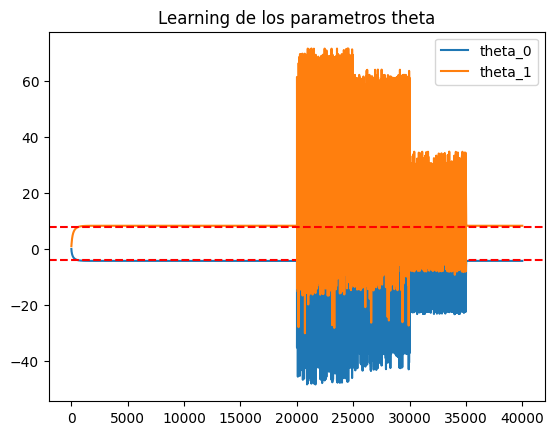

In [ ]:
plt.plot(t0_hat, label = 'theta_0')
plt.axhline(y = theta_0, color='red', linestyle='--')

plt.plot(t1_hat, label = 'theta_1')
plt.axhline(y = theta_1, color='red', linestyle='--')

plt.title("Learning de los parametros theta")
plt.legend()

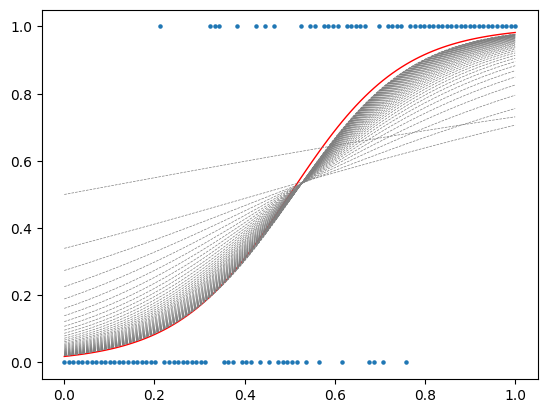

In [ ]:
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, 8, x1), color='red', linewidth = 1)

for i in range(50):
    plt.plot(x1, y_hat(t0_hat[10*i], t1_hat[10*i], x1), color= 'gray', linewidth= .5, linestyle= '--')

Text(0, 0.5, 'theta_1')

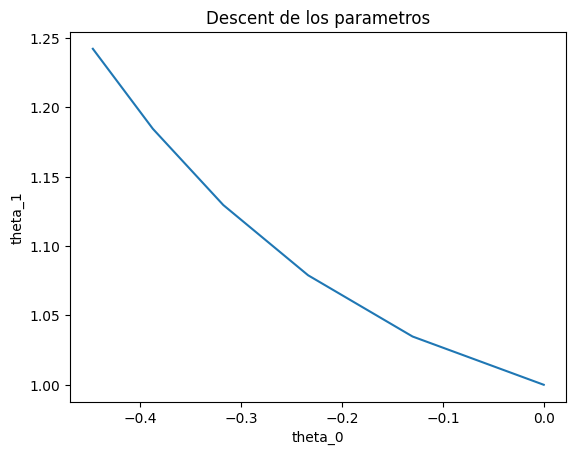

In [ ]:
plt.plot(t0_hat[0:6], t1_hat[0:6])

plt.title("Descent de los parametros")
plt.xlabel('theta_0')
plt.ylabel('theta_1')

In [ ]:
# Ejemplo de SGD con librerias

from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [ ]:
x, y = make_regression(n_samples=1000, n_features=30)

sgdr = SGDRegressor()
print(sgdr)

In [ ]:
sgdr.fit(x, y)

score = sgdr.score(x, y)
print("R-squared:", score)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x1_reshape=x1.reshape(-1,1)

log_reg1 = LogisticRegression(penalty = None).fit(x1_reshape, y)
log_reg2 = LogisticRegression(penalty = 'l2').fit(x1_reshape, y)

# Arreglar

In [ ]:
print('theta_0:', log_reg1.intercept_, '\n', 
      'theta_1:', log_reg1.coef_)

In [ ]:
print('theta_0:', log_reg2.intercept_, '\n', 
      'theta_1:', log_reg2.coef_)

# TAREA para el viernes:

1. Modificar el step size/learning rate y ver que pasa.
2. Graficar theta_0 vs theta_1, y ver como se mueve el punto en el plano (mostrar con colores, flechas, etc. el movimiento)
3. Simular y ajustar/learn los parametros del modelo (https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics): 
$$ f(x, \theta_0, \theta_1) = y = \dfrac{\theta_0  x}{(\theta_1 + x)} + \epsilon $$

Enviar el codigo con comentarios. Subir la tarea a su cuenta de GIT y me envian el link.

1) Cuando el learning rate o step size es muy cercana a 1, por ejemplo valores para rho como 0.9 o 0.5, en la gráfica podemos observar que el algoritmo como tal no aprende (no converge). Es como el ejemplo visto en clases que no se llega a una solución y la función "choca con las paredes". En caso de elegir un learning rate de 0.3 ocurre lo mismo, pero al final si converge, lo que podría decir que se demora en encontrar la solución o en aprender.

2)

3) Simular y ajustar/learn los parámetros del modelo

In [ ]:
def y_hat(theta_0, theta_1, x):
    p = ((theta_0 * x) / (theta_1 + x)) + 0.01
    return(p)

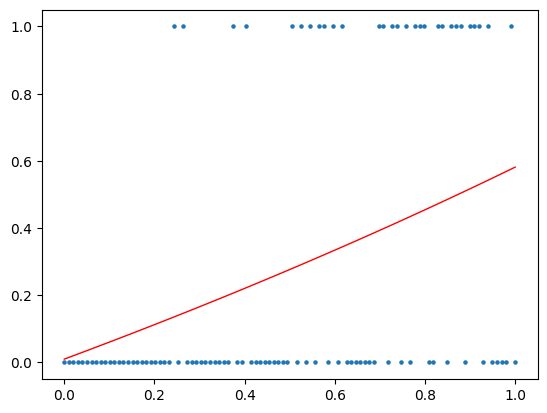

In [ ]:
# Simulemos 100 datos para nuestra regression logistica
n = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_0, theta_1 = [4, 8]

# Simular los datos x1, y
# Grilla de valores para nuestra covariable
x1 = np.linspace(0, 1, n)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y = np.random.binomial(1, y_hat(theta_0, theta_1, x1), n)

# Graficamos
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, -8, x1), color='red', linewidth = 1)

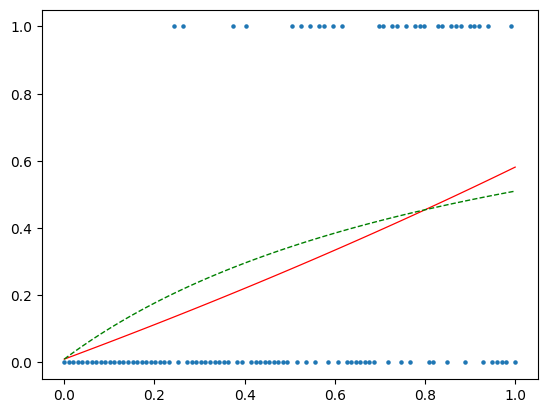

In [ ]:
# Ahora vamos a realizar un SGD para estimar los parametros theta.
# Inicializar parametros
t0 = 1
t1 = 1

plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, -8, x1), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados (no aprendidos aun)
plt.plot(x1, y_hat(t0, t1, x1), color= 'green', linewidth= 1, linestyle= '--')

In [ ]:
# Definimos nuestra Loss function
def loss_fun(Y, X, t0, t1):
    loss = -1/n * np.sum(Y * np.log(y_hat(t0, t1, X)) + (1 - Y) * np.log(1 - y_hat(t0, t1, X)))
    return(loss)

# Obtenemos la cantidad error que cometemos
loss_ini = loss_fun(y, x1, t0, t1)
print("LOSS inicial:", loss_ini)

LOSS inicial: 0.5102172217139718


In [ ]:
# Llevamos registro del error y los parametros
error = []
error.append(loss_ini)

t0_hat = []
t1_hat = []

t0_hat.append(t0)
t1_hat.append(t1)

In [ ]:
# Gradient descent
def delta_theta_0(y, x1, t0, t1):
    delta_0 = np.sum((y_hat(t0, t1, x1) - y))
    return(delta_0)

def delta_theta_1(y, x1, t0, t1):
    delta_1 = np.sum((y_hat(t0, t1, x1) - y) * x1)
    return(delta_1)

# Step size o learnig rate
rho = 0.01

In [ ]:
t0 -= rho * delta_theta_0(y, x1, t0, t1)
t1 -= rho * delta_theta_1(y, x1, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun(y, x1, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')

[1, 0.9737220218051467]
[1, 1.007681732572843]
[0.5102172217139718, 0.5097077584596934]


Text(0.5, 1.0, 'Loss en funcion del Epoch')

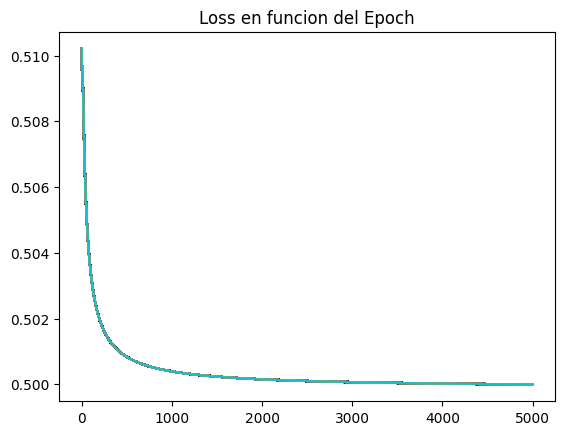

In [ ]:
epoch = 5000

for i in range(epoch):
    t0 -= rho * delta_theta_0(y, x1, t0, t1)
    t1 -= rho * delta_theta_1(y, x1, t0, t1)
    
    t0_hat.append(t0)
    t1_hat.append(t1)
    
    loss = loss_fun(y, x1, t0, t1)
    error.append(loss)
    plt.plot(error)
plt.title("Loss en funcion del Epoch")

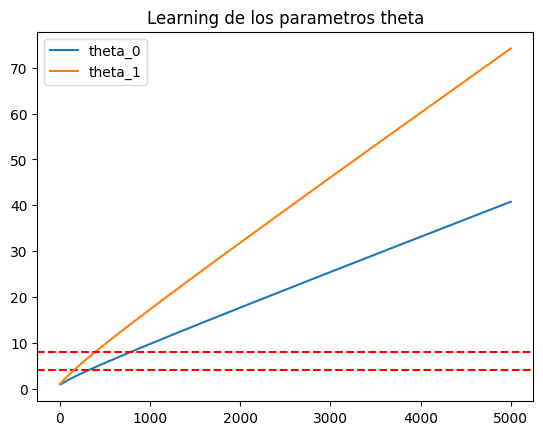

In [ ]:
plt.plot(t0_hat, label = 'theta_0')
plt.axhline(y = theta_0, color='red', linestyle='--')

plt.plot(t1_hat, label = 'theta_1')
plt.axhline(y = theta_1, color='red', linestyle='--')

plt.title("Learning de los parametros theta")
plt.legend()

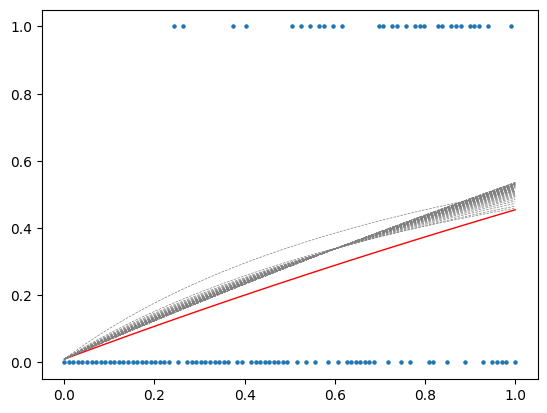

In [ ]:
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(4, 8, x1), color='red', linewidth = 1)

for i in range(50):
    plt.plot(x1, y_hat(t0_hat[10*i], t1_hat[10*i], x1), color= 'gray', linewidth= .5, linestyle= '--')

2)

Text(0, 0.5, 'theta_1')

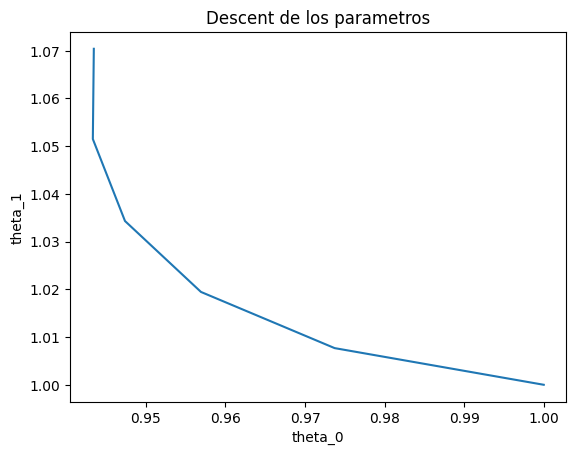

In [ ]:
plt.plot(t0_hat[0:6], t1_hat[0:6])

plt.title("Descent de los parametros")
plt.xlabel('theta_0')
plt.ylabel('theta_1')